In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('./data_labels_mainData.csv')

In [ ]:


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

In [2]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [3]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [4]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.12.0'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [5]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

NameError: name 'train_data' is not defined

In [ ]:
train_data.dtypes

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [5]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

NameError: name 'test_data' is not defined

In [ ]:
model.evaluate(test_generator)

In [6]:
label_names = {'fibroblast' : 0, 'inflammatory' : 1, 'epithelial' : 2, 'other' : 3}

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(25,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# VGG Model

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [ ]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [ ]:
import tensorflow as tf

model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

In [ ]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
reg_lambda = 0.001

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5), #0.2
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_2 = model_VGG_2.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'], 
                    history_VGG_2.history['categorical_accuracy'], history_VGG_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [169]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 4 classes.


In [ ]:
model_VGG_2.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(25,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_2.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [9]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [ ]:

reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3.compile(optimizer='adam'
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_3 = model_VGG_3.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3.history['loss'], history_VGG_3.history['val_loss'], 
                    history_VGG_3.history['categorical_accuracy'], history_VGG_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
model_VGG_3.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_3.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [ ]:

reg_lambda = 0.001

model_VGG_3_reg = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3_reg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_3_reg = model_VGG_3_reg.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3_reg.history['loss'], history_VGG_3_reg.history['val_loss'], 
                    history_VGG_3_reg.history['categorical_accuracy'], history_VGG_3_reg.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
model_VGG_3_reg.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_3_reg.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# TESTING IF THIS MODEL IS BETTER


In [170]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [15]:

reg_lambda = 0.001

modelAllIn1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [16]:
modelAllIn1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_modelAllIn1 = modelAllIn1.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)


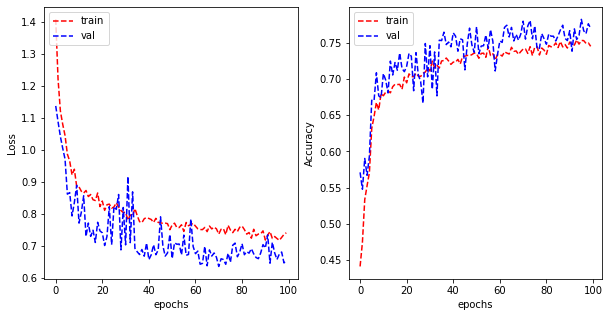

In [17]:

plot_learning_curve(history_modelAllIn1.history['loss'], history_modelAllIn1.history['val_loss'], 
                    history_modelAllIn1.history['categorical_accuracy'], history_modelAllIn1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [18]:
modelAllIn1.evaluate(test_generator)

1980/1980 [==============================] - 6s 3ms/step - loss: 0.6933 - categorical_accuracy: 0.7545


[0.6933382153511047, 0.7545454502105713]

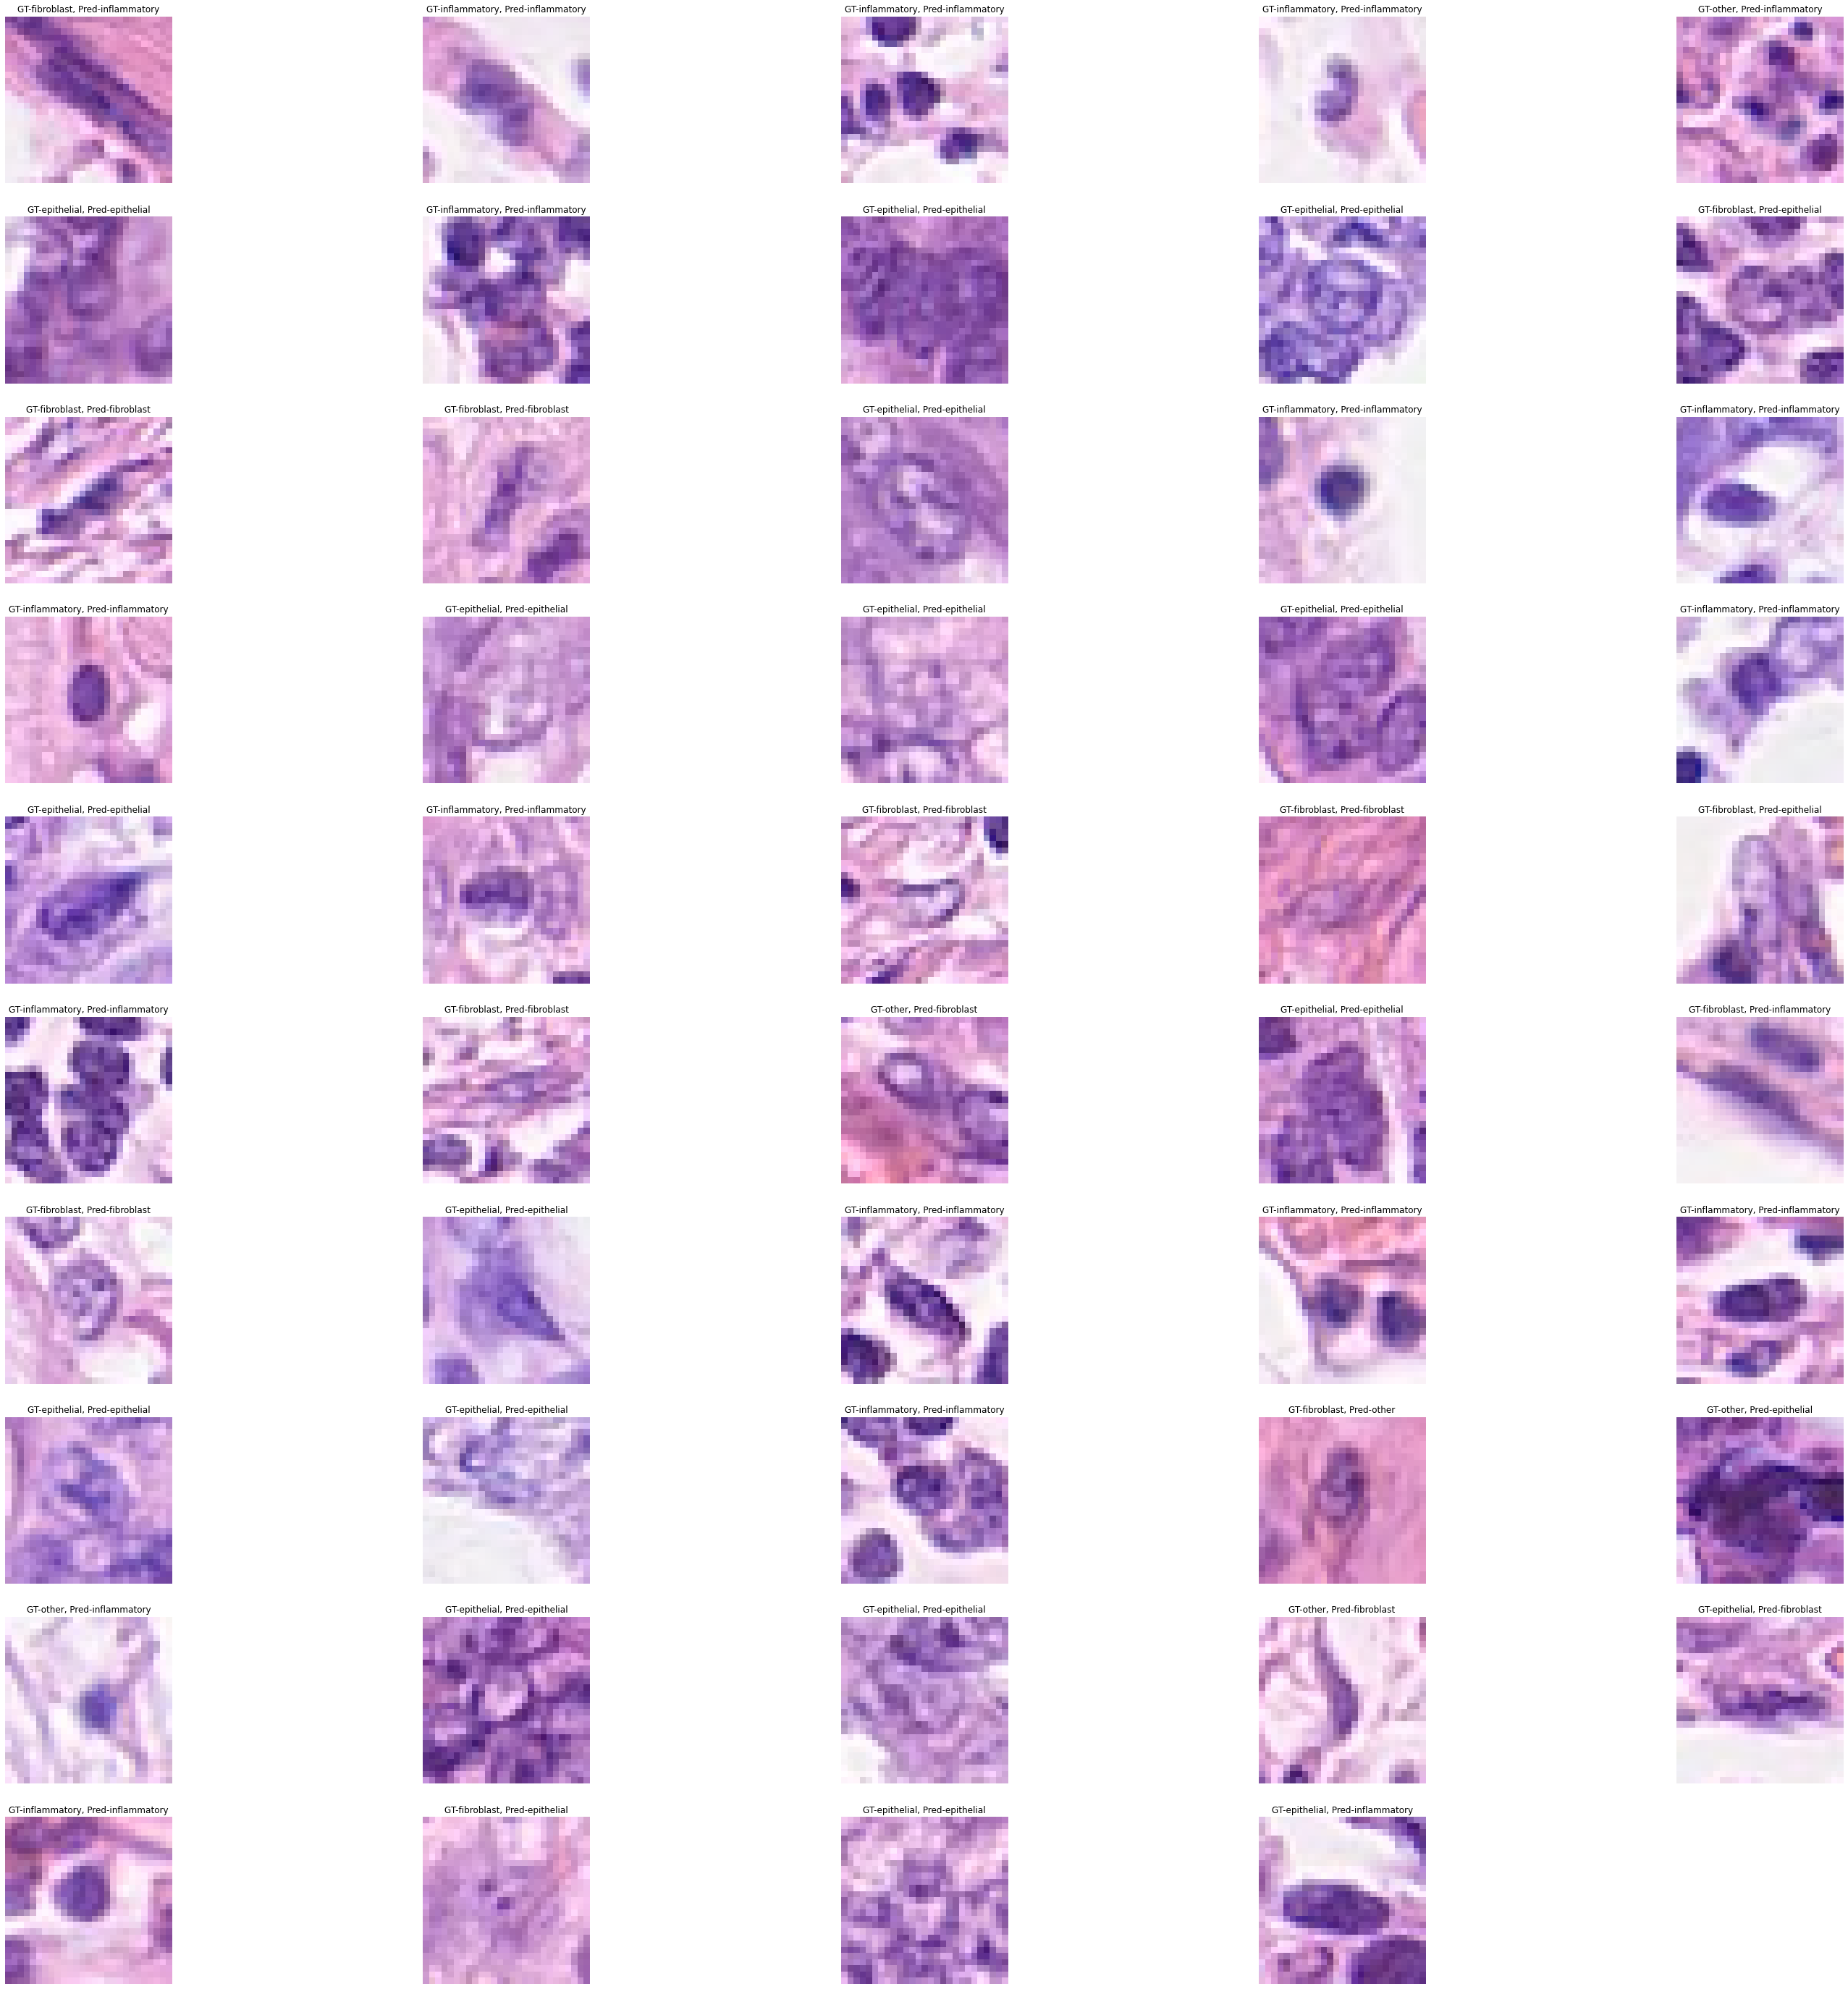

In [19]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelAllIn1.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [171]:
#reg_lambda = 0.001
reg_lambda = 0.001

modelDept = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),


    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
#     # Additional block
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
])


#modelDept.compile(optimizer='adam',
 #             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  #            metrics=['categorical_accuracy'])

In [172]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

def lr_schedule(epoch):
    lr = 15e-4 #1e-3 
    if epoch > 20:
        lr *= 0.5
    if epoch > 40:
        lr *= 0.5
    return lr

optimizer = Adam()
modelDept.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['categorical_accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)

history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, 
                                  verbose=1, callbacks=[early_stop, lr_scheduler])#, batch_size=64) #  
#history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

Epoch 1/100
186/186 [==============================] - 19s 88ms/step - loss: 2.1935 - categorical_accuracy: 0.5390 - val_loss: 3.5790 - val_categorical_accuracy: 0.4093 - lr: 0.0015
Epoch 2/100
186/186 [==============================] - 16s 88ms/step - loss: 1.8371 - categorical_accuracy: 0.6306 - val_loss: 2.4951 - val_categorical_accuracy: 0.4103 - lr: 0.0015
Epoch 3/100
186/186 [==============================] - 17s 89ms/step - loss: 1.6516 - categorical_accuracy: 0.6529 - val_loss: 1.6188 - val_categorical_accuracy: 0.6225 - lr: 0.0015
Epoch 4/100
186/186 [==============================] - 16s 86ms/step - loss: 1.4996 - categorical_accuracy: 0.6682 - val_loss: 1.8362 - val_categorical_accuracy: 0.5457 - lr: 0.0015
Epoch 5/100
186/186 [==============================] - 17s 89ms/step - loss: 1.3796 - categorical_accuracy: 0.6840 - val_loss: 1.2516 - val_categorical_accuracy: 0.7473 - lr: 0.0015
Epoch 6/100
186/186 [==============================] - 16s 87ms/step - loss: 1.2847 - cate

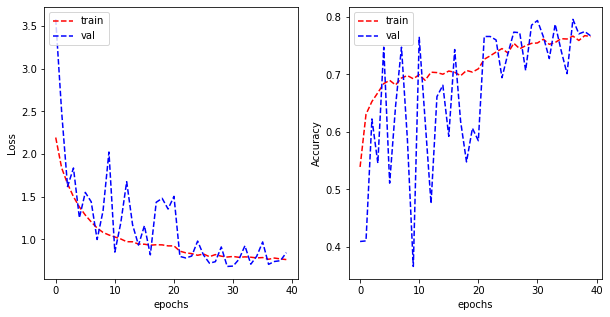

In [173]:

plot_learning_curve(history_modelDept.history['loss'], history_modelDept.history['val_loss'], 
                    history_modelDept.history['categorical_accuracy'], history_modelDept.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

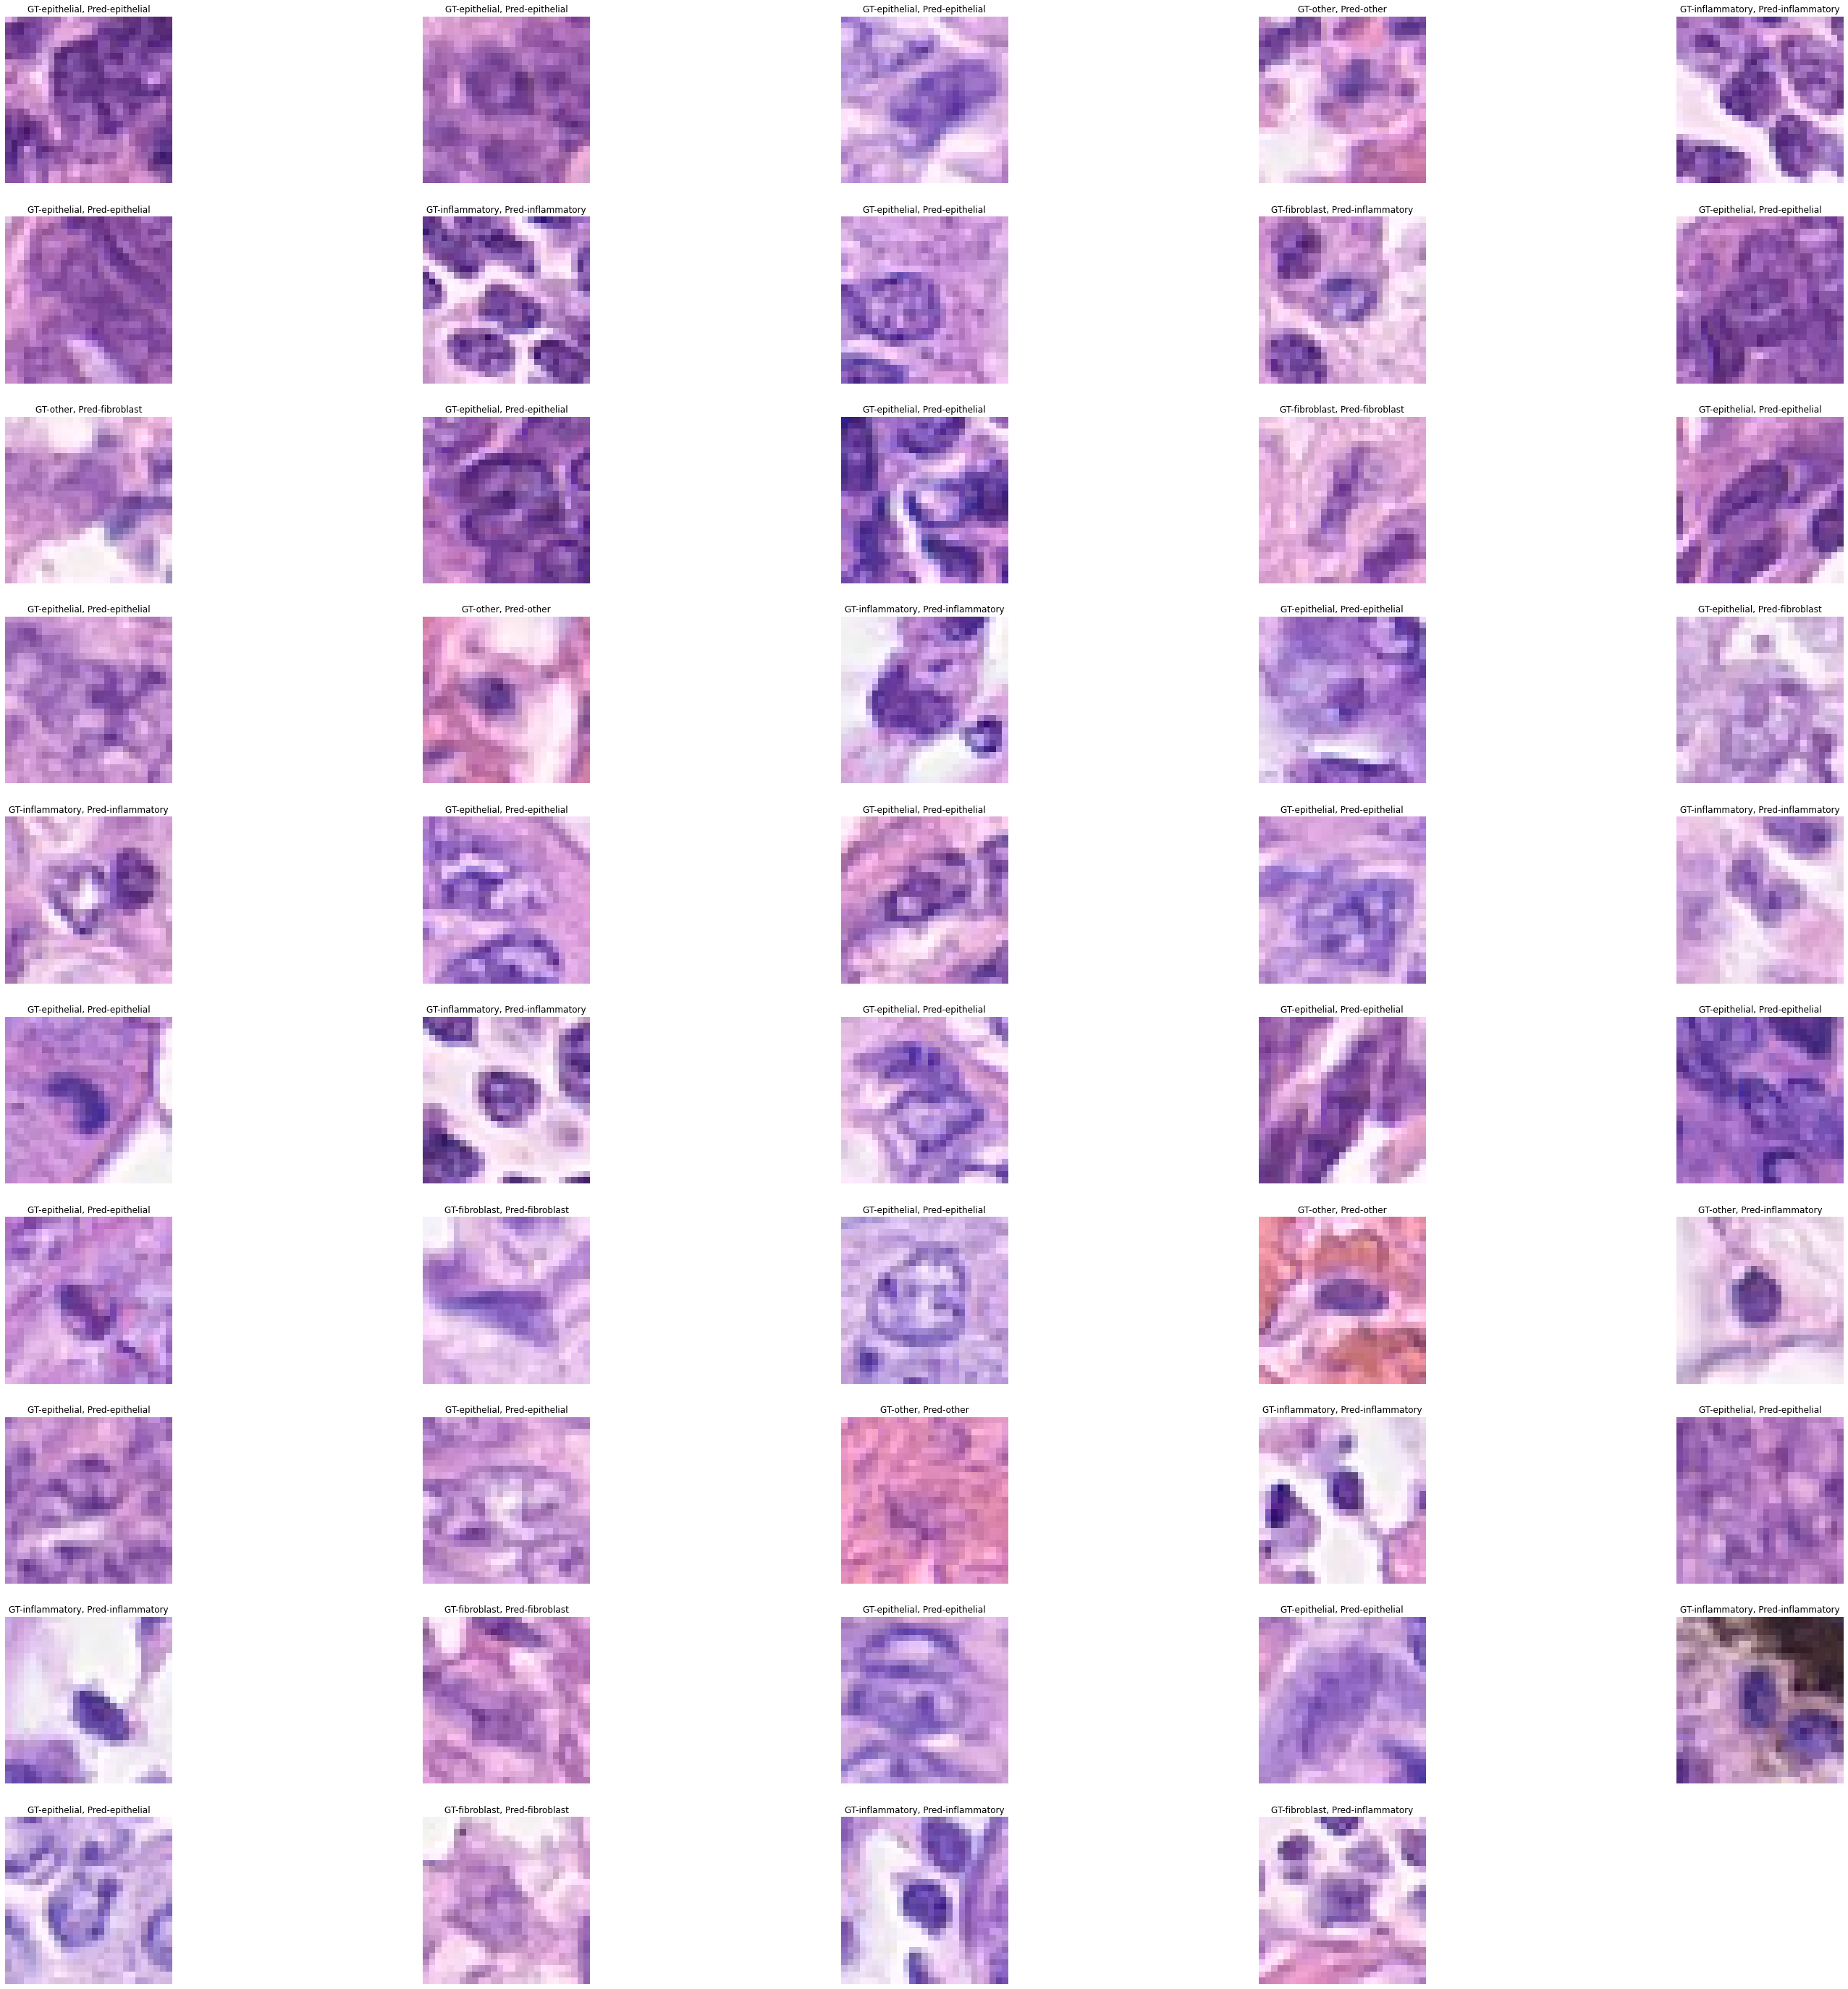

In [118]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelDept.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [174]:
modelDept.evaluate(test_generator)

1980/1980 [==============================] - 9s 5ms/step - loss: 0.9351 - categorical_accuracy: 0.7556


[0.935106098651886, 0.7555555701255798]

In [133]:
modelDept.evaluate(test_generator)

1980/1980 [==============================] - 15s 8ms/step - loss: 0.6967 - categorical_accuracy: 0.8025


[0.6966766119003296, 0.8025252819061279]

In [119]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(model, data_generator):
    true_labels = data_generator.classes
    predictions = model.predict(data_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    
    return precision, recall, f1


In [120]:
precision, recall, f1 = calculate_metrics(modelDept, test_generator)

1980/1980 [==============================] - 11s 5ms/step


In [121]:
print(precision, recall, f1)

0.25335683735774206 0.25596289315299914 0.2525479200132007


# Further improvements

In [185]:
# Define constants
IMG_SIZE = 27
NUM_CHANNELS = 3
OUTPUT_CLASSES = 4
BATCH_SIZE = 32
REG_LAMBDA = 0.001
LEARNING_RATE = 15e-4 #1e-3
EPOCHS = 100
PATIENCE = 20

In [188]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    data_format='channels_last',
    rotation_range=15, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    data_format='channels_last'
)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [189]:
#reg_lambda = 0.001
reg_lambda = 0.001

modelDept = tf.keras.Sequential([
    #VGG block 1
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
     #                      kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),


    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
])
modelDept.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (None, 27, 27, 64)        1792      
                                                                 
 batch_normalization_220 (Ba  (None, 27, 27, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_221 (Conv2D)         (None, 27, 27, 64)        36928     
                                                                 
 batch_normalization_221 (Ba  (None, 27, 27, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                     

In [190]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, min_lr=1e-6)
optimizer = Adam()

modelDept.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['categorical_accuracy'])

history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, 
                                  verbose=1, callbacks=[early_stop, reduce_lr])#, batch_size=64) #  
#history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

Epoch 1/100
186/186 [==============================] - 28s 142ms/step - loss: 2.2419 - categorical_accuracy: 0.5676 - val_loss: 3.1292 - val_categorical_accuracy: 0.4093 - lr: 0.0010
Epoch 2/100
186/186 [==============================] - 25s 134ms/step - loss: 1.9204 - categorical_accuracy: 0.6203 - val_loss: 2.9066 - val_categorical_accuracy: 0.4462 - lr: 0.0010
Epoch 3/100
186/186 [==============================] - 25s 134ms/step - loss: 1.7716 - categorical_accuracy: 0.6550 - val_loss: 2.2823 - val_categorical_accuracy: 0.4017 - lr: 0.0010
Epoch 4/100
186/186 [==============================] - 25s 133ms/step - loss: 1.6634 - categorical_accuracy: 0.6545 - val_loss: 1.7807 - val_categorical_accuracy: 0.5407 - lr: 0.0010
Epoch 5/100
186/186 [==============================] - 26s 138ms/step - loss: 1.5211 - categorical_accuracy: 0.6758 - val_loss: 1.3820 - val_categorical_accuracy: 0.6908 - lr: 0.0010
Epoch 6/100
186/186 [==============================] - 25s 135ms/step - loss: 1.4099 

Epoch 86/100
186/186 [==============================] - 30s 160ms/step - loss: 0.6005 - categorical_accuracy: 0.8114 - val_loss: 0.5411 - val_categorical_accuracy: 0.8368 - lr: 1.2500e-04
Epoch 87/100
186/186 [==============================] - 30s 161ms/step - loss: 0.5868 - categorical_accuracy: 0.8201 - val_loss: 0.5398 - val_categorical_accuracy: 0.8327 - lr: 1.2500e-04
Epoch 88/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5813 - categorical_accuracy: 0.8198 - val_loss: 0.5819 - val_categorical_accuracy: 0.8151 - lr: 1.2500e-04
Epoch 89/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5883 - categorical_accuracy: 0.8179 - val_loss: 0.5937 - val_categorical_accuracy: 0.8196 - lr: 1.2500e-04
Epoch 90/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5862 - categorical_accuracy: 0.8206 - val_loss: 0.5391 - val_categorical_accuracy: 0.8343 - lr: 1.2500e-04
Epoch 91/100
186/186 [==============================] - 28s 

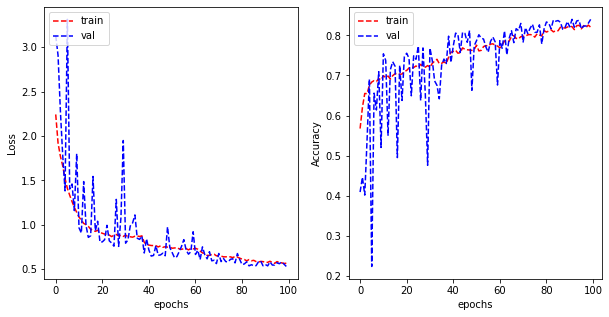

In [191]:

plot_learning_curve(history_modelDept.history['loss'], history_modelDept.history['val_loss'], 
                    history_modelDept.history['categorical_accuracy'], history_modelDept.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [192]:
test_data['cellType'] = test_data['cellType'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

modelDept.evaluate(test_generator)

Found 1980 validated image filenames belonging to 4 classes.
1980/1980 [==============================] - 9s 5ms/step - loss: 0.6117 - categorical_accuracy: 0.8187


[0.611672043800354, 0.818686842918396]

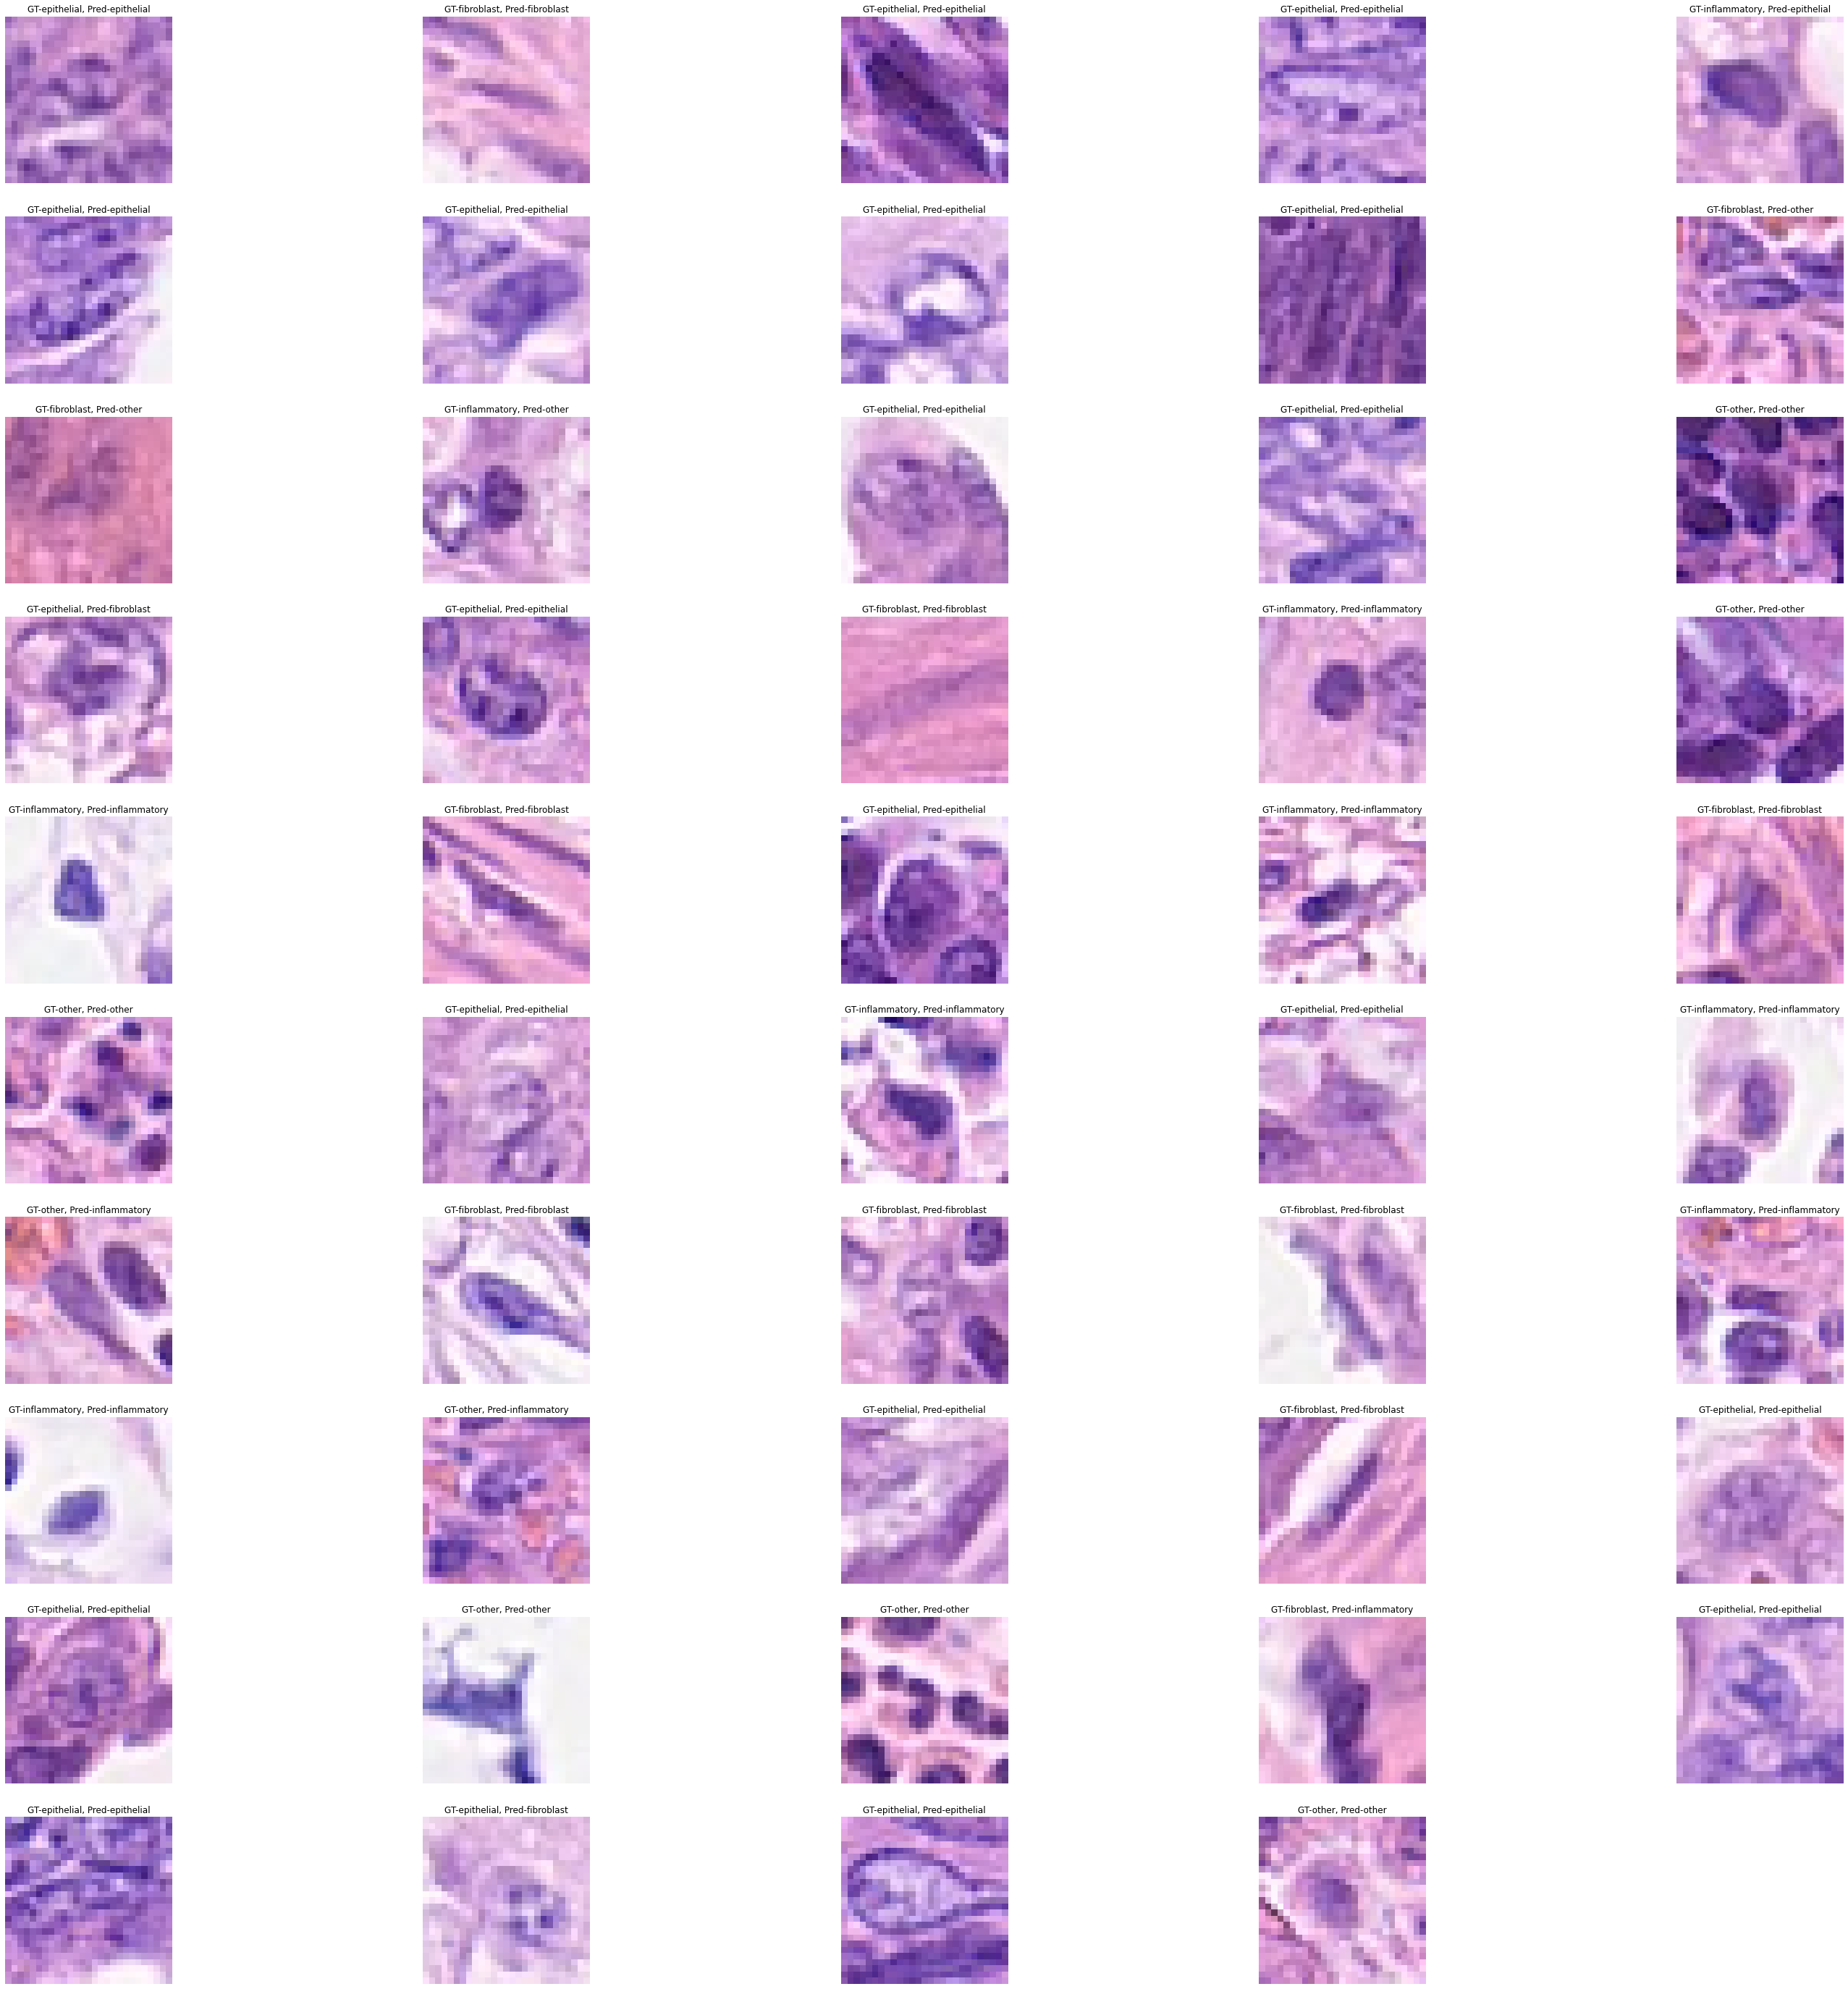

In [184]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelDept.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
https://github.com/shabbeersh/RCCNet/blob/master/Src/RCCNet.py
